# Machine Learning Analysis Using UNSW-NB 15 Dataset: Identifying Network Attack Classification

This analytical notebook focuses on applying and comparing various machine learning techniques:

- Logistic Regression
- Decision Trees
- Random Forest
- Neural Networks (specifically, Multi-layer perceptron)

The analysis will be conducted on the UNSW-NB 15 dataset, created using the IXIA PerfectStorm tool in the Cyber Range Lab of the Australian Centre for Cyber Security (ACCS). This dataset is a mix of real normal activities and synthetic modern attack behaviours. For more details, visit [UNSW-NB 15 dataset information](https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/).

The dataset, comprising raw network packets, was captured using the Tcpdump tool, amounting to 100 GB of data (e.g., Pcap files). It encompasses nine attack types: Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, and Worms. Tools like Argus and Bro-IDS, along with twelve algorithms, were used to generate 49 features with class labels, detailed in the UNSW-NB15_features.csv file.

The dataset is divided into training (175,341 records) and testing sets (82,332 records), as outlined in UNSW_NB15_training-set.csv and UNSW_NB15_testing-set.csv. These sets include various record types, both attack and normal.

The dataset and its features are demonstrated in the testbed configuration and feature creation methods of UNSW-NB15 (Figures 1 and 2).

Relevant research papers detailing the UNSW-NB15 dataset include:

- Moustafa, Nour, and Jill Slay's works on the dataset's creation, evaluation, and statistical analysis.
- Studies on anomaly detection and big data analytics in intrusion detection systems.

The UNSW-NB15 dataset is freely available for academic research, with commercial use requiring author agreement. Proper citation of the mentioned papers is required when using the dataset.

For additional information, contact Harshil Patel & Yuesheng Chen, Industrial Engineering students at Ohio State University, focusing on new Cyber threat intelligence approaches and Industry 4.0 technologies.

This notebook will involve:

- Data preprocessing for ML model training.
- Training ML models using cross-validation.
- Evaluating ML models with testing data.

# Machine Learning Implementation: Importing Libraries

To implement the machine learning methods described for analyzing the UNSW-NB 15 dataset, we'll be using Python's `sklearn` library, among others. Below is a list of necessary libraries and their import statements to facilitate the various machine learning algorithms:


In [1]:
# data cleaning and plots
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# sklearn: data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# sklearn: train model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, classification_report

# sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Data Processing

## Loading and Preparing the UNSW-NB15 Dataset

**Overview of UNSW-NB15 Dataset**

The UNSW-NB15 dataset, designed for network intrusion detection systems, is detailed in the `UNSW-NB15_features.csv` file. It is split into two parts: a training set and a testing set.

**Training and Testing Data**

- The training set, `UNSW_NB15_training-set.csv`, contains 175,341 records.
- The testing set, `UNSW_NB15_testing-set.csv`, comprises 82,332 records.
- These records include a variety of types, both attack and normal.

**Features and Response Variables**

- The dataset's features, as outlined in `UNSW-NB15_features.csv`, include a range of network traffic attributes.
- The response variable `attack_cat` categorizes the data into nine types of attacks: Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode, and Worms.
- Additionally, there is a binary label with 0 indicating normal records and 1 signifying attack records.

The data processing stage involves loading these datasets, followed by cleaning, preprocessing, and preparing them for the machine learning models. This includes handling missing values, encoding categorical features, and scaling numerical features for optimal model performance.


In [2]:
! pip install -q kaggle

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d mrwellsdavid/unsw-nb15

 96% 143M/149M [00:01<00:00, 73.9MB/s]
100% 149M/149M [00:01<00:00, 89.1MB/s]


In [5]:
! unzip unsw-nb15.zip
! mv UNSW_NB15_training-set.csv UNSW_NB15_testing.csv
! mv UNSW_NB15_testing-set.csv UNSW_NB15_training.csv

Archive:  unsw-nb15.zip
  inflating: NUSW-NB15_features.csv  
  inflating: UNSW-NB15_1.csv         
  inflating: UNSW-NB15_2.csv         
  inflating: UNSW-NB15_3.csv         
  inflating: UNSW-NB15_4.csv         
  inflating: UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  


In [6]:
# Load data
initial_data = pd.read_csv('UNSW_NB15_training.csv')

In [7]:
# Look at the first 5 rows
initial_data.head(n=5)

id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
4   5  0.449454   tcp       -   FIN     10      6     534     268  33.373826   

   ...  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
0  ...                 1               1             0           0   
1  ...                 1               2             0           0   
2  ...                 1               3             0           0   
3  ...                 1               3             1           1   
4  ...                 1              40             0           0   

   ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  attack_cat  \
0                 0           1           1                0      Normal   
1                 0           1           6                0      Normal   
2                 0           2           6                0      Normal   
3                 0           2           1                0      Normal   
4                 0           2          39                0      Normal   

   label  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 45 columns]

In [8]:
# Data information
initial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

## Data Cleaning

### Identifying Missing Values

In [9]:
# check if there are Null values
initial_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:
# Discard the rows with missing values
data_to_use = initial_data.dropna()

# Data Dimensions: It is observed that the total count of rows remains unchanged, indicating the absence of null values.
data_to_use.shape

(175341, 45)

### Check imbalanced issue on y

First, we get the `X` and `y1` and `y2` .

In [11]:
X = data_to_use.drop(axis=1, columns=['attack_cat']) # X is a dataframe
X = X.drop(axis=1, columns=['label'])


y1 = data_to_use['attack_cat'].values # y is an array
y2 = data_to_use['label'].values

In [12]:
# Calculate Y2 ratio
def data_ratio(y2):
    '''
    Calculate Y2's ratio
    '''
    unique, count = np.unique(y2, return_counts=True)
    ratio = round(count[0]/count[1], 1)
    return f'{ratio}:1 ({count[0]}/{count[1]})'

The class ratio for the original data: 1.1:1 (2000/1746)
['Normal' 'Normal' 'Normal' ... 'Generic' 'Generic' 'Generic']


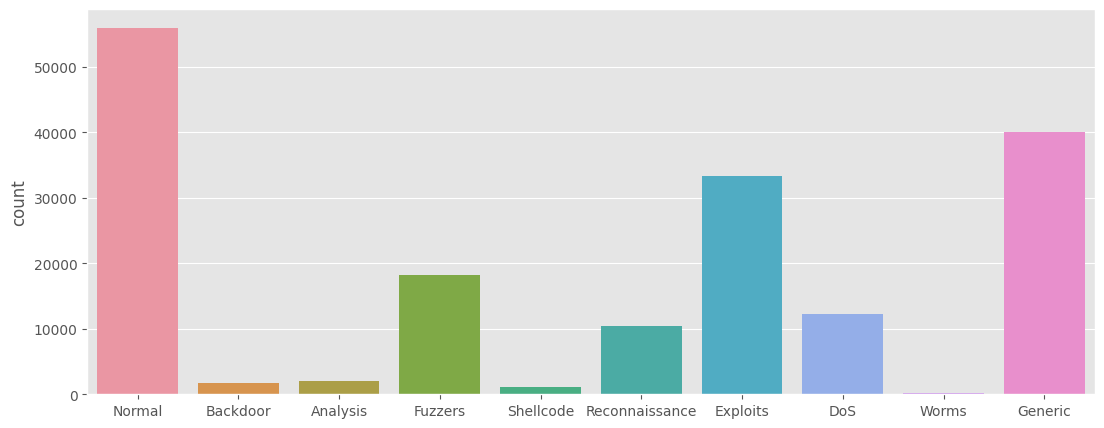

The class ratio for the original data: 0.5:1 (56000/119341)


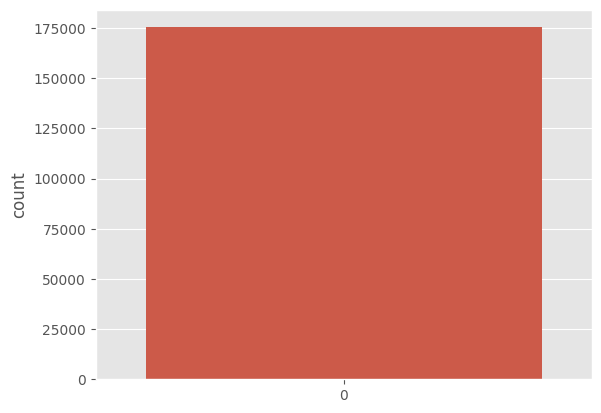

In [13]:
print('The class ratio for the original data:', data_ratio(y1))
plt.figure(figsize=(13,5))
print(y1)
sns.countplot(x=y1,label="Sum")
plt.show()

print('The class ratio for the original data:', data_ratio(y2))
sns.countplot(y2,label="Sum")
plt.show()

The dataset exhibits an imbalance in its classes. Although there are methods available for sampling to rectify this issue, in this case, we will proceed without addressing the imbalance. Our main objective is to implement several machine learning models and evaluate their respective performances.

### Data Splitting Strategy

The process of dividing `X` (features) and `y` (target variable) into training and testing sets is crucial. Typically, a 70% training and 30% testing split is preferred. However, in this scenario, the splitting has already been predefined in the dataset, with designated files for the training set (UNSW_NB15_training-set.csv) and the testing set (UNSW_NB15_testing-set.csv).

- **Training Set Size:** The training set consists of 175,341 records.
- **Testing Set Size:** The testing set comprises 82,332 records, encompassing a mix of attack and normal types.

The dataset configuration and feature creation process for the UNSW-NB15 are illustrated in the provided figure.

Given this pre-arranged data partitioning, there is no need for additional code to split the data.

In [16]:
# Load data
test_data = pd.read_csv('UNSW_NB15_testing.csv')
X_test = test_data.drop(axis=1, columns=['attack_cat']) # X_test is a dataframe
X_test = X_test.drop(axis=1, columns=['label'])


y1_test = test_data['attack_cat'].values # y is an array
y2_test = test_data['label'].values

We will convert the orginal training data to the datframes called X_train, y1_train, y2_train

In [17]:
X_train = X
y1_train = y1
y2_train = y2

### Preparing Training and Testing Data

#### Applying Transformations to X_train and X_test

Scikit-learn offers a variety of transformer classes, each with a `fit` method to learn parameters (like mean and standard deviation for normalization) from the training set. These parameters are then applied to unseen data using the `transform` method.

**Important Note:** The rationale behind performing transformations after splitting the data is to ensure that the parameters are `fit` exclusively on the training set.

Moreover, it's common to apply different transformation techniques to different types of columns in your dataset. The `ColumnTransformer` in scikit-learn lets you selectively implement data preparation transformations. For instance, it enables the application of specific transformations to only numerical columns and different transformations to categorical columns.

For our dataset, we need to apply `OneHotEncoder` to the `Gender` column, which is categorical, and `StandardScaler` to the other numerical columns.

- `OneHotEncoder`: This transformer converts categorical data into a format that can be more easily processed by ML models.
- `StandardScaler`: It standardizes features by removing the mean and scaling to unit variance, which is particularly useful for algorithms sensitive to the scale of input features.

The first step in this process involves identifying which columns are categorical and which are numerical in our dataset.

In [18]:
# determine categorical and numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

In [19]:
numerical_cols

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [20]:
categorical_cols

Index(['proto', 'service', 'state'], dtype='object')


Next, we create a ColumnTransformer object and proceed to fit it using the training data.

In [21]:
# define the transformation methods for the columns
t = [('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
    ('scale', StandardScaler(), numerical_cols)]

col_trans = ColumnTransformer(transformers=t)

# fit the transformation on training data
col_trans.fit(X_train)

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['proto', 'service', 'state'], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [22]:
X_train_transform = col_trans.transform(X_train)

apply transformation to both training and testing data and fit the transformation on training data

In [25]:
X_test_transform = col_trans.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


We could look at the transformed training data. It becomes an array-like structure rather than a dataframe structure.

In [26]:
# look at the transformed training data
X_train_transform.shape

(175341, 192)

In [27]:
X_test_transform.shape

(82332, 192)

#### Applying Transformations to y_train and y_test

The `LabelEncoder` class in scikit-learn is designed to normalize labels, ensuring they only contain values ranging from 0 to n_classes-1. In the context of our dataset, the target variable `y` has two distinct labels: 1 (indicating no liver disease) and 2 (indicating liver disease). We will use `LabelEncoder` to reassign these labels as 0 and 1, respectively, where 0 will now represent the absence of liver disease and 1 will represent its presence.

Although this transformation could be simply achieved by subtracting 1 from the `y` array, using `LabelEncoder` is a more standardized approach for handling target values in machine learning. As with the transformation on `X`, the `fit` method will be applied to `y_train` to learn the encoding. This learned encoding will then be used to transform both `y_train` and `y_test`, ensuring consistency in how the target variable is represented across the training and testing sets.

In [28]:
# Note that the distinct values/labels in `y2` target are 1 and 2.
pd.unique(y1)

array(['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode',
       'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic'],
      dtype=object)

In [29]:
col_trans

ColumnTransformer(transformers=[('ohe',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['proto', 'service', 'state'], dtype='object')),
                                ('scale', StandardScaler(),
                                 Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object'))])

In [30]:
pd.unique(y2)

array([0, 1])

In [31]:
# Define a LabelEncoder() transformation method and fit on y1_train
target_trans = LabelEncoder()
target_trans.fit(y1_train)

LabelEncoder()

In [32]:
# Apply transformation method on y1_train and y1_test
y1_train_transform = target_trans.transform(y1_train)
y1_test_transform = target_trans.transform(y1_test)

In [33]:
# View the transformed y1_train
y1_train_transform

array([6, 6, 6, ..., 5, 5, 5])

In [36]:
one_hot_representation = np.eye(10)[y1_train_transform]
one_hot_representation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
# Define a LabelEncoder() transformation method and fit on y2_train
target_trans = LabelEncoder()
target_trans.fit(y2_train)
y2_train_transform = target_trans.transform(y2_train)
y2_test_transform = target_trans.transform(y2_test)

In [35]:
# view the transformed y2_train
y2_train_transform

array([0, 0, 0, ..., 1, 1, 1])

# Attack Detection

## Training Machine Learning Models

We aim to train a variety of machine learning models using the training set and then assess their performance on both the training and testing sets. Let's outline the standard process for training a specific classifier.

### Training Model Procedure

1. **Training and Cross-Validation:**
   - **Initial Training:** We start by training a machine learning model.
   - **5-Fold Cross-Validation (CV):** This step involves validating the model's performance using 5-fold CV. This approach helps in understanding how well the model is trained with the given training data and set hyperparameters.
   - **Evaluation Metrics:** The model's effectiveness is assessed using metrics like accuracy, precision, recall, F1 score, and the Area Under the Curve (AUC) value of the Receiver Operating Characteristic (ROC).

2. **Testing the Model:**
   - **Model Evaluation:** After training, the model is evaluated using the testing data. This step is crucial to gauge the model's ability to make predictions on unseen data.

**Note:** To maintain simplicity, we will not be tuning hyperparameters in the machine learning models. Instead, we'll use the default settings of hyperparameters for each model.

### Training a Logistic Regression Model

As a starting point, we will first train a `Logistic Regression` model, following both Step 1 and Step 2. The response feature we'll use for this model is `y2`.

In [ ]:
# ===== Step 1: cross-validation ========
# define a Logistic Regression classifier
clf = LogisticRegression(solver='lbfgs', random_state=123, max_iter = 4000)

# define  Stratified 5-fold cross-validator, it provides train/validate indices to split data in train/validate sets.
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# define metrics for evaluating
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# perform the 5-fold CV and get the metrics results
cv_results = cross_validate(estimator=clf,
                            X=X_train_transform,
                            y=y2_train_transform,
                            scoring=scoring,
                            cv=cv,
                            return_train_score=False) # prevent to show the train scores on cv splits.

In [ ]:
cv_results

{'fit_time': array([14.94010496,  9.20837879,  6.77230144,  7.60493374,  7.76093411]),
 'score_time': array([0.20899248, 0.07535577, 0.07465744, 0.07698655, 0.13580275]),
 'test_accuracy': array([0.92791354, 0.92711304, 0.92731265, 0.9272271 , 0.92748375]),
 'test_precision': array([0.91376168, 0.91190568, 0.91250339, 0.91281277, 0.91386873]),
 'test_recall': array([0.98726381, 0.9883945 , 0.98793363, 0.98738897, 0.98642534]),
 'test_f1': array([0.94909179, 0.94861072, 0.94872156, 0.94863744, 0.94876186]),
 'test_roc_auc': array([0.96948667, 0.96945284, 0.96892232, 0.96798497, 0.96939381])}

When evaluating the results of cross-validation (CV), several key metrics are included:

- **`test_score`**: This is the array of scores obtained on each CV split. If multiple scoring metrics are used, the suffix `_score` changes to reflect the specific metric, such as `test_accuracy` or `test_f1`.

- **`fit_time`**: This represents the time taken to fit the estimator to the training set for each CV split.

- **`score_time`**: This is the time taken to score the estimator on the test set for each CV split.

For a comprehensive assessment of the CV results, the mean value of each metric is typically used. This approach provides a more generalized understanding of the model's performance across different splits. For instance, one might calculate the mean value of the `accuracy` score to gauge the overall accuracy of the model during cross-validation. This mean score offers an insight into how the model is likely to perform on average, rather than relying on the performance in a single CV split.

In [ ]:
cv_results['test_accuracy'].mean()

0.9274100153214219

In addition to evaluating model performance, the cross-validation process is typically employed to identify the optimal set of hyperparameters that yield the best metric scores. However, in this instance, since we're not engaging in hyperparameter tuning, we will proceed to fit the Logistic Regression model using its default hyperparameter values. Following this, we'll evaluate the model's performance on the testing data. This approach allows us to assess how well the model, with its standard settings, generalizes to new, unseen data.

In [ ]:
# ======== Step 2: Evaluate the model using testing data =======

# fit the Logistic Regression model
clf.fit(X=X_train_transform, y=y2_train_transform)

# predition on testing data
y_pred_class = clf.predict(X=X_test_transform)
y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]

# AUC of ROC
auc_ontest = roc_auc_score(y_true=y2_test_transform, y_score=y_pred_score)
# confusion matrix
cm_ontest = confusion_matrix(y_true=y2_test_transform, y_pred=y_pred_class)
# precision score
precision_ontest = precision_score(y_true=y2_test_transform, y_pred=y_pred_class)
# recall score
recall_ontest = recall_score(y_true=y2_test_transform, y_pred=y_pred_class)
# classifition report
cls_report_ontest = classification_report(y_true=y2_test_transform, y_pred=y_pred_class)

# print the above results
print('The model scores {:1.5f} ROC AUC on the test set.'.format(auc_ontest))
print('The precision score on the test set: {:1.5f}'.format(precision_ontest))
print('The recall score on the test set: {:1.5f}'.format(recall_ontest))
print('Confusion Matrix:\n', cm_ontest)
# Print classification report:
print('Classification Report:\n', cls_report_ontest)

The model scores 0.88658 ROC AUC on the test set.
The precision score on the test set: 0.72834
The recall score on the test set: 0.94174
Confusion Matrix:
 [[21077 15923]
 [ 2641 42691]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.57      0.69     37000
           1       0.73      0.94      0.82     45332

    accuracy                           0.77     82332
   macro avg       0.81      0.76      0.76     82332
weighted avg       0.80      0.77      0.76     82332



By following the outlined steps, we can evaluate the trained model's effectiveness in predicting new, unseen data. Remember, our goal is to develop a machine learning model that can accurately classify attack behaviors in network traffic. Ideally, we want a model that can detect as many attack instances as possible. Essentially, this means the model should exhibit high "coverage" (the ability to detect attacks) and high "precision" (accuracy in identifying true attacks). **For this reason, the `F1 score` emerges as an appropriate evaluation metric. The `F1 score` is essentially a harmonized measure of precision and recall, achieving its optimal value at 1 (indicating perfect precision and recall) and its lowest at 0.**

### Implementing Multiple Machine Learning Models

In our analysis, we plan to deploy a variety of machine learning models, following the procedure outlined earlier. The key variation across models lies in the choice of the classifier function. For instance, we replace `clf = LogisticRegression()` with other model-specific functions as needed.

The machine learning models to be implemented include:

- **`LogisticRegression()`:** A straightforward yet powerful algorithm for binary classification problems.
- **`DecisionTreeClassifier()`:** This model uses a decision tree to make predictions, useful for non-linear data.
- **`RandomForestClassifier()`:** An ensemble of decision trees, it offers improved accuracy and robustness over a single decision tree.
- **`MLPClassifier()`:** This is a Multi-layer Perceptron classifier, a type of neural network.

A special note on `MLPClassifier()`:
- **Solver:** We use the `lbfgs` solver, which tends to be more efficient for smaller datasets.
- **Maximum Iterations:** Set to 5000, ensuring enough time for the model to converge.
- **Random State:** We specify a `random_state` to ensure that our results are reproducible, an important aspect of scientific analysis.

Each of these models will be trained and evaluated using the same dataset, allowing us to compare their performances under similar conditions.

In [ ]:
# Define four models
models = [('LogisticRegression', LogisticRegression(random_state=123, max_iter=5000)),
          ('DecisionTree', DecisionTreeClassifier(random_state=123)),
          ('RandomForest', RandomForestClassifier(random_state=123)),
          ('MultiLayerPerceptron', MLPClassifier(random_state=123, solver='adam', max_iter=8000))
         ]

We could check the hyperparameters values in these models:

In [ ]:
for model_name, clf in models:
    print(clf)

LogisticRegression(max_iter=5000, random_state=123)
DecisionTreeClassifier(random_state=123)
RandomForestClassifier(random_state=123)
MLPClassifier(max_iter=8000, random_state=123)


In [ ]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
model_names_list = []
cv_fit_time_mean_list = []
cv_accuracy_mean_list = []
cv_precision_mean_list = []
cv_recall_mean_list = []
cv_f1_mean_list = []
cv_roc_auc_mean_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_list = []
test_roc_auc_list = []

test_roc_curve_df = pd.DataFrame()


for model_name, clf in models:

    # ==== Step 1: Cross-validation =====

    # define  Stratified 5-fold cross-validator
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    # define metrics for evaluating
    scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    # perform the 5-fold CV and get the metrics results
    cv_results = cross_validate(estimator=clf,
                                X=X_train_transform,
                                y=y2_train_transform,
                                scoring=scoring,
                                cv=cv,
                                return_train_score=False)  # prevent to show the train scores on cv splits.

    # calculate the mean values of those scores
    cv_fit_time_mean = cv_results['fit_time'].mean()
    cv_accuracy_mean = cv_results['test_accuracy'].mean()
    cv_precision_mean = cv_results['test_precision'].mean()
    cv_recall_mean = cv_results['test_recall'].mean()
    cv_f1_mean = cv_results['test_f1'].mean()
    cv_roc_auc_mean = cv_results['test_roc_auc'].mean()

    # store CV results into those lists
    model_names_list.append(model_name)
    cv_fit_time_mean_list.append(cv_fit_time_mean)
    cv_accuracy_mean_list.append(cv_accuracy_mean)
    cv_precision_mean_list.append(cv_precision_mean)
    cv_recall_mean_list.append(cv_recall_mean)
    cv_f1_mean_list.append(cv_f1_mean)
    cv_roc_auc_mean_list.append(cv_roc_auc_mean)

    # ==== Step 2: Evaluation on Testing data =====

    # fit model
    clf.fit(X=X_train_transform, y=y2_train_transform)


    # predicted label or class
    y_pred_class = clf.predict(X=X_test_transform)
    # predicted probability of the label 1
    y_pred_score = clf.predict_proba(X=X_test_transform)[:, 1]
    # accuracy
    accuracy_ontest = accuracy_score(y_true=y2_test_transform, y_pred=y_pred_class)
    # auc of ROC
    auc_ontest = roc_auc_score(y_true=y2_test_transform, y_score=y_pred_score)
    # precision score
    precision_ontest = precision_score(y_true=y2_test_transform, y_pred=y_pred_class)
    # recall score
    recall_ontest = recall_score(y_true=y2_test_transform, y_pred=y_pred_class)
    # F1 score
    f1_ontest = f1_score(y_true=y2_test_transform, y_pred=y_pred_class)
    # roc curve dataframe
    fpr, tpr, threshold_roc = roc_curve(y_true=y2_test_transform, y_score=y_pred_score)
    roc_df = pd.DataFrame(list(zip(fpr, tpr, threshold_roc)),
                          columns=['False Positive Rate', 'True Positive Rate', 'Threshold'])
    roc_df['Model'] = '{} (AUC = {:.3f})'.format(model_name, auc_ontest)


    # store the above values
    test_accuracy_list.append(accuracy_ontest)
    test_roc_auc_list.append(auc_ontest)
    test_precision_list.append(precision_ontest)
    test_recall_list.append(recall_ontest)
    test_f1_list.append(f1_ontest)

    test_roc_curve_df = pd.concat([test_roc_curve_df, roc_df],
                                 ignore_index=True)

### Comparing Models

Having accumulated the cross-validation results and testing data evaluations for the four machine learning models, we can now compile these into a dataframe for easy comparison and analysis.

In [ ]:
results_dict = {'Model Name': model_names_list,
                'CV Fit Time': cv_fit_time_mean_list,
                'CV Accuracy mean': cv_accuracy_mean_list,
                'CV Precision mean': cv_precision_mean_list,
                'CV Recall mean': cv_recall_mean_list,
                'CV F1 mean': cv_f1_mean_list,
                'CV AUC mean': cv_roc_auc_mean_list,
                'Test Accuracy': test_accuracy_list,
                'Test Precision': test_precision_list,
                'Test Recall': test_recall_list,
                'Test F1': test_f1_list,
                'Test AUC': test_roc_auc_list
                }

results_df = pd.DataFrame(results_dict)

# sort the results according to F1 score on testing data
results_df.sort_values(by='Test F1', ascending=False)

Model Name  CV Fit Time  CV Accuracy mean  CV Precision mean  \
2          RandomForest    26.123734          0.959736           0.963049   
1          DecisionTree     2.032464          0.948552           0.962916   
3  MultiLayerPerceptron   200.365182          0.947000           0.952396   
0    LogisticRegression     7.532397          0.927410           0.912970   

   CV Recall mean  CV F1 mean  CV AUC mean  Test Accuracy  Test Precision  \
2        0.978381    0.970654     0.993565       0.870731        0.818020   
1        0.961438    0.962176     0.942744       0.862605        0.823384   
3        0.970840    0.961442     0.990394       0.859010        0.819175   
0        0.987481    0.948765     0.969048       0.774523        0.728341   

   Test Recall   Test F1  Test AUC  
2     0.984161  0.893433  0.977035  
1     0.955396  0.884491  0.854642  
3     0.954668  0.881747  0.961131  
0     0.941741  0.821407  0.886583

#### Analyzing F1 Scores

Referring to Section above, we've selected the `F1 score` as our primary metric for evaluating model performance on test data. Examining the results in the provided table, it becomes evident that the `Random Forest` model surpasses the others with the highest F1 score. However, the proximity of the scores among all models suggests that each of them presents a valid and acceptable option.

While tuning hyperparameters could potentially enhance performance, the `Random Forest` model already establishes a strong baseline for this cybersecurity classification dataset. Additionally, hyperparameter adjustments in the `MultiLayer Perceptron` model, such as modifying epochs or layer configurations, might also yield beneficial results.

#### Comparison of ROC Curves

The ROC curve, or Receiver Operating Characteristic curve, is a visual representation used to assess the performance of a binary classification system by varying its decision threshold. It is generated by plotting the true positive rate (TPR) versus the false positive rate (FPR) across different thresholds.

The AUC ROC (Area Under the Curve - Receiver Operating Characteristic) score is an indicator of the model's ability to differentiate between classes. **A higher AUC indicates a more effective model at correctly classifying 0s as 0s and 1s as 1s, akin to better distinguishing between patients with and without a disease.**

This presentation includes ROC curves and their corresponding AUC scores for four different models. We utilize the `plotly` package to display an interactive chart.

The previous script calculated TPR, FPR, and threshold levels for the ROC curves, which are organized in the `test_roc_curve_df` dataframe with columns `False Positive Rate`, `True Positive Rate`, `Threshold`, and `Model`.


In [ ]:
test_roc_curve_df.head()

False Positive Rate  True Positive Rate  Threshold  \
0                  0.0            0.000000        2.0   
1                  0.0            0.000949        1.0   
2                  0.0            0.001213        1.0   
3                  0.0            0.001257        1.0   
4                  0.0            0.001324        1.0   

                              Model  
0  LogisticRegression (AUC = 0.887)  
1  LogisticRegression (AUC = 0.887)  
2  LogisticRegression (AUC = 0.887)  
3  LogisticRegression (AUC = 0.887)  
4  LogisticRegression (AUC = 0.887)

In [ ]:
!pip install plotly
!pip install cufflinks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
# plotly imports
import plotly.express as px
import plotly.graph_objects as go

In [ ]:

ROC_fig = px.line(test_roc_curve_df,
                  x='False Positive Rate',
                  y='True Positive Rate',
                  color='Model',
                  hover_data=['Threshold'])

# Update layout
ROC_fig.update_layout(
    legend=go.layout.Legend(
        x=0.5,
        y=0.1,
        traceorder="normal",
        font=dict(
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ),
    title=go.layout.Title(text="ROC Curve for Test Dataset", xref="paper", x=0),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(text="False Positive Rate"),
        scaleanchor="y",
        scaleratio=1
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(text="True Positive Rate")
    ),
    width=700,  # Set width (in pixels)
    height=700  # Set height (in pixels) - same as width for a square aspect ratio
)

# Show the figure
ROC_fig.show()


## Exploring Model Characteristics

While achieving strong predictive performance is a primary objective in machine learning model development, relying solely on evaluation metrics may prove inadequate. This approach assumes that the evaluation metric and the test dataset perfectly represent the target domain, which is seldom the case.

In specific domains, interpretability becomes a crucial requirement before deploying a model. When a model displays performance challenges, it becomes imperative to delve into its inner workings to comprehend the underlying issues.

The `sklearn.inspection` module offers a suite of tools designed to facilitate an understanding of a model's predictions and the factors influencing them. These tools can be employed to scrutinize assumptions and biases in a model, enhance model design, or diagnose and address issues related to model performance.

### Understanding Partial Dependence Plots (PDPs)

Partial dependence plots (PDPs) are used to illustrate the relationship between a target variable $y$ and a set of selected 'target' features $X$, while averaging out the influence of all other 'complement' features. Essentially, PDPs can be viewed as showing the expected value of the target variable as a function of the 'target' features.

**PDPs are insightful for understanding the impact of features on model predictions.** For those who have experience with linear regression models, the concept of PDPs can be somewhat analogous to how coefficients in these models are interpreted. However, PDPs are capable of revealing more intricate patterns in complex models than what simple linear model coefficients can depict. We will demonstrate a few examples, elucidate how these plots should be interpreted, and then go through the code needed to generate such plots.

#### Illustration: PDP for LogisticRegression

We will now create a PDP for a previously trained LogisticRegression model. Our focus will be on examining how various features influence the predicted category of 'attack_cat'.

In [ ]:
# import the plot function
from sklearn.inspection import PartialDependenceDisplay

To effectively utilize the `plot_partial_dependence` function, it's crucial to understand and correctly use its five key arguments, each serving a specific purpose in generating partial dependence plots:

1. **`estimator`**: This should be your already trained model or classifier. It's the source from which the partial dependence is calculated.

2. **`X`**: This argument represents your training dataset, which the estimator has been trained on.

3. **`features`**: Here, you specify the indices of the features you are interested in analyzing through the PDP. These are the 'target' features for which the dependence plot will be created.

4. **`feature_names`**: This is a list of all feature names in your training data. It provides a clear reference for understanding which features correspond to which indices.

5. **`target`**: In scenarios where you are dealing with a multi-class classification problem, this argument lets you specify for which class the PDPs should be computed.

Given these requirements, the first step is to identify the indices of the features of interest in your transformed training data. It's important to note that during data transformation processes (like normalization, encoding, etc.), the original names and order of the features might have been altered.

To understand the current structure of your transformed training dataset, `X_train_transform`, you need to examine the feature names and their order. You can do this by invoking the `get_column_names_from_ColumnTransformer` method on your `col_trans` object. This method will retrieve the new names of the features post-transformation, helping you accurately map the features to their respective indices for the `plot_partial_dependence` function.

In [ ]:
from sklearn.pipeline import Pipeline
def get_column_names_from_ColumnTransformer(column_transformer):
    col_name = []

    for transformer_in_columns in column_transformer.transformers_:
        raw_col_name = transformer_in_columns[2]

        if isinstance(transformer_in_columns[1], Pipeline):
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]

        try:
            names = transformer.get_feature_names(input_features=raw_col_name)

        except AttributeError: # if no 'get_feature_names' function, use raw column name

            if transformer_in_columns[1] == "passthrough":
                names = column_transformer._feature_names_in[raw_col_name]
            else:
                names = raw_col_name

        if isinstance(names,np.ndarray):
            col_name += names.tolist()

        elif isinstance(names,pd.Index):
            col_name += names.tolist()

        elif isinstance(names,list):
            col_name += names

        elif isinstance(names,str):
            col_name.append(names)

    return col_name

In [ ]:
new_cols = get_column_names_from_ColumnTransformer(col_trans)

new_cols

['dur',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports']

In [ ]:
models[0]

('LogisticRegression', LogisticRegression(max_iter=5000, random_state=123))

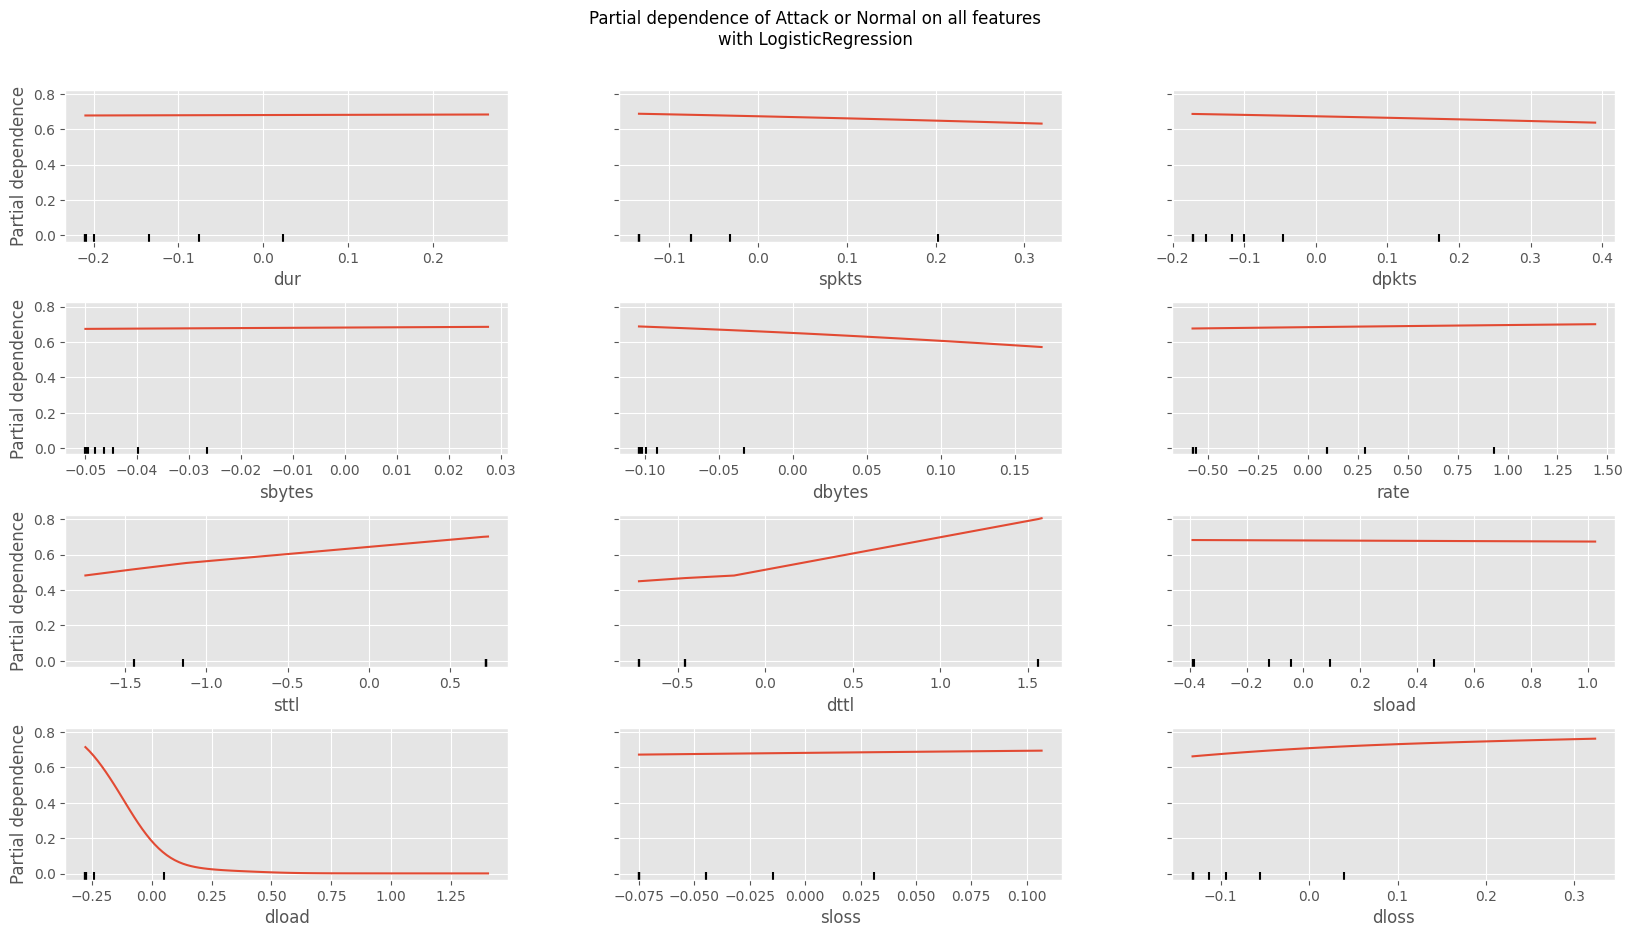

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

clf_name = models[0][0]  # the classifier name
clf = models[0][1]  # the classifier itself

features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Create the partial dependence plot
display = PartialDependenceDisplay.from_estimator(clf, X_train_transform, features,
                                                  feature_names=new_cols, target=1)

# Get the figure from the display object
fig = display.figure_

# Customize the figure
fig.suptitle("Partial dependence of Attack or Normal on all features\nwith {}".format(clf_name))
fig.set_size_inches(20, 10)
fig.subplots_adjust(hspace=.4, wspace=.25, top=.9)


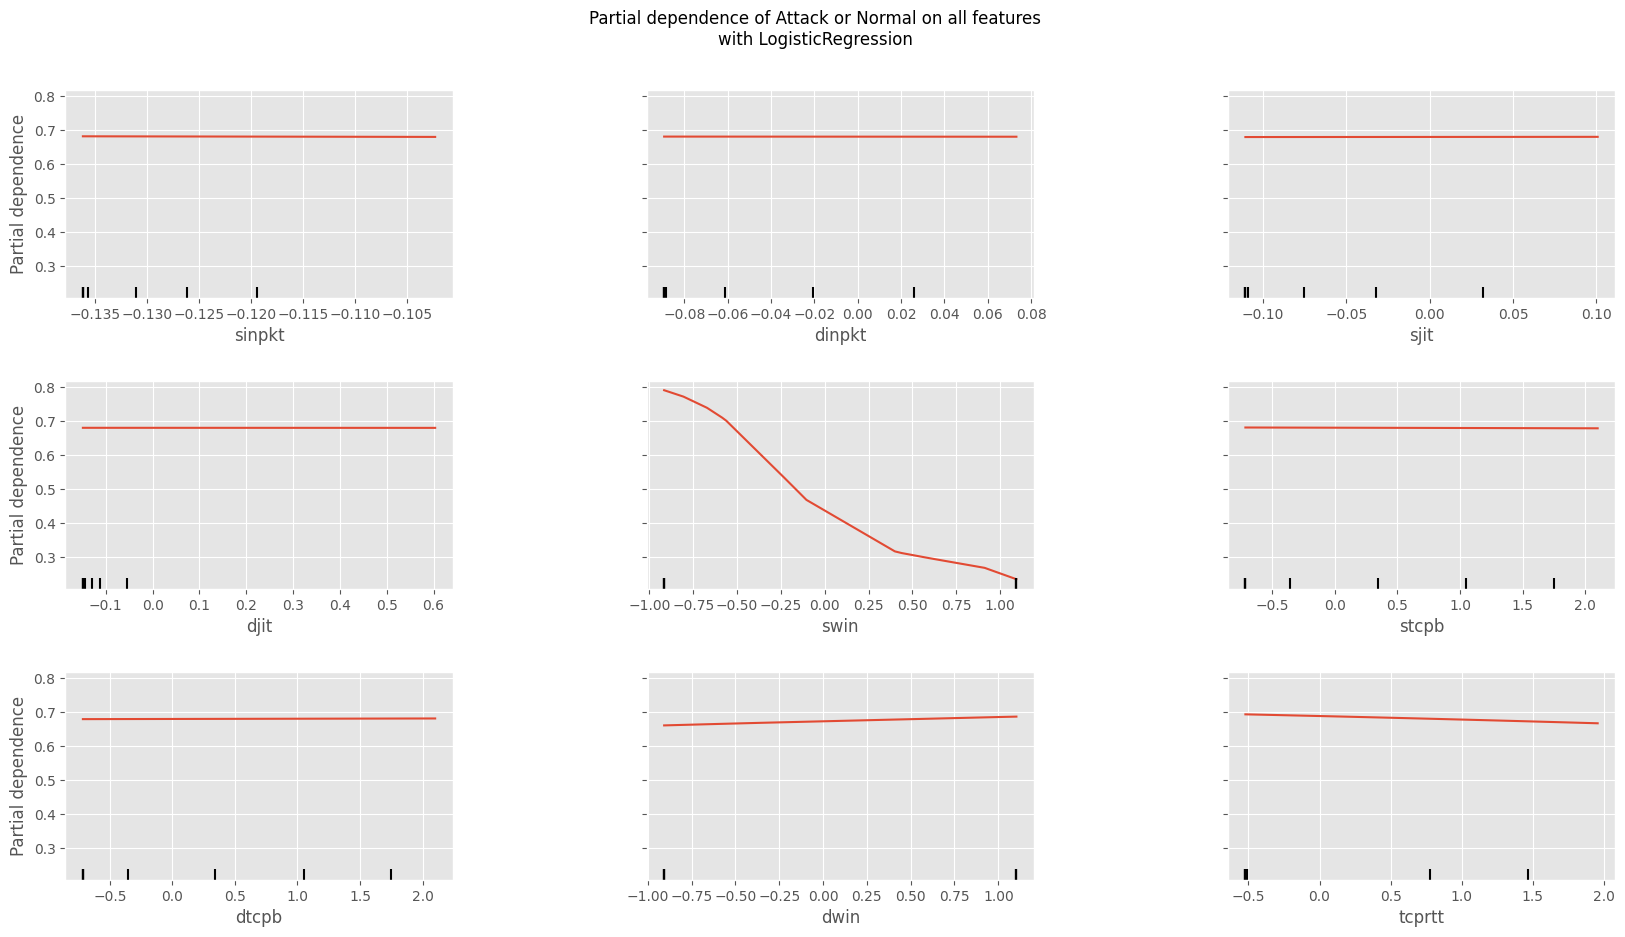

In [ ]:
clf_name = models[0][0]  # the classifier name
clf = models[0][1]  # the classifier itself

features = [12, 13, 14, 15, 16, 17, 18, 19, 20]

# Create the partial dependence plot
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Get the figure from the display object
fig = display.figure_

# Customize the figure
fig.suptitle("Partial dependence of Attack or Normal on all features\nwith {}".format(clf_name))
fig.set_size_inches(20, 10)
fig.subplots_adjust(hspace=.4, wspace=.5, top=.9)


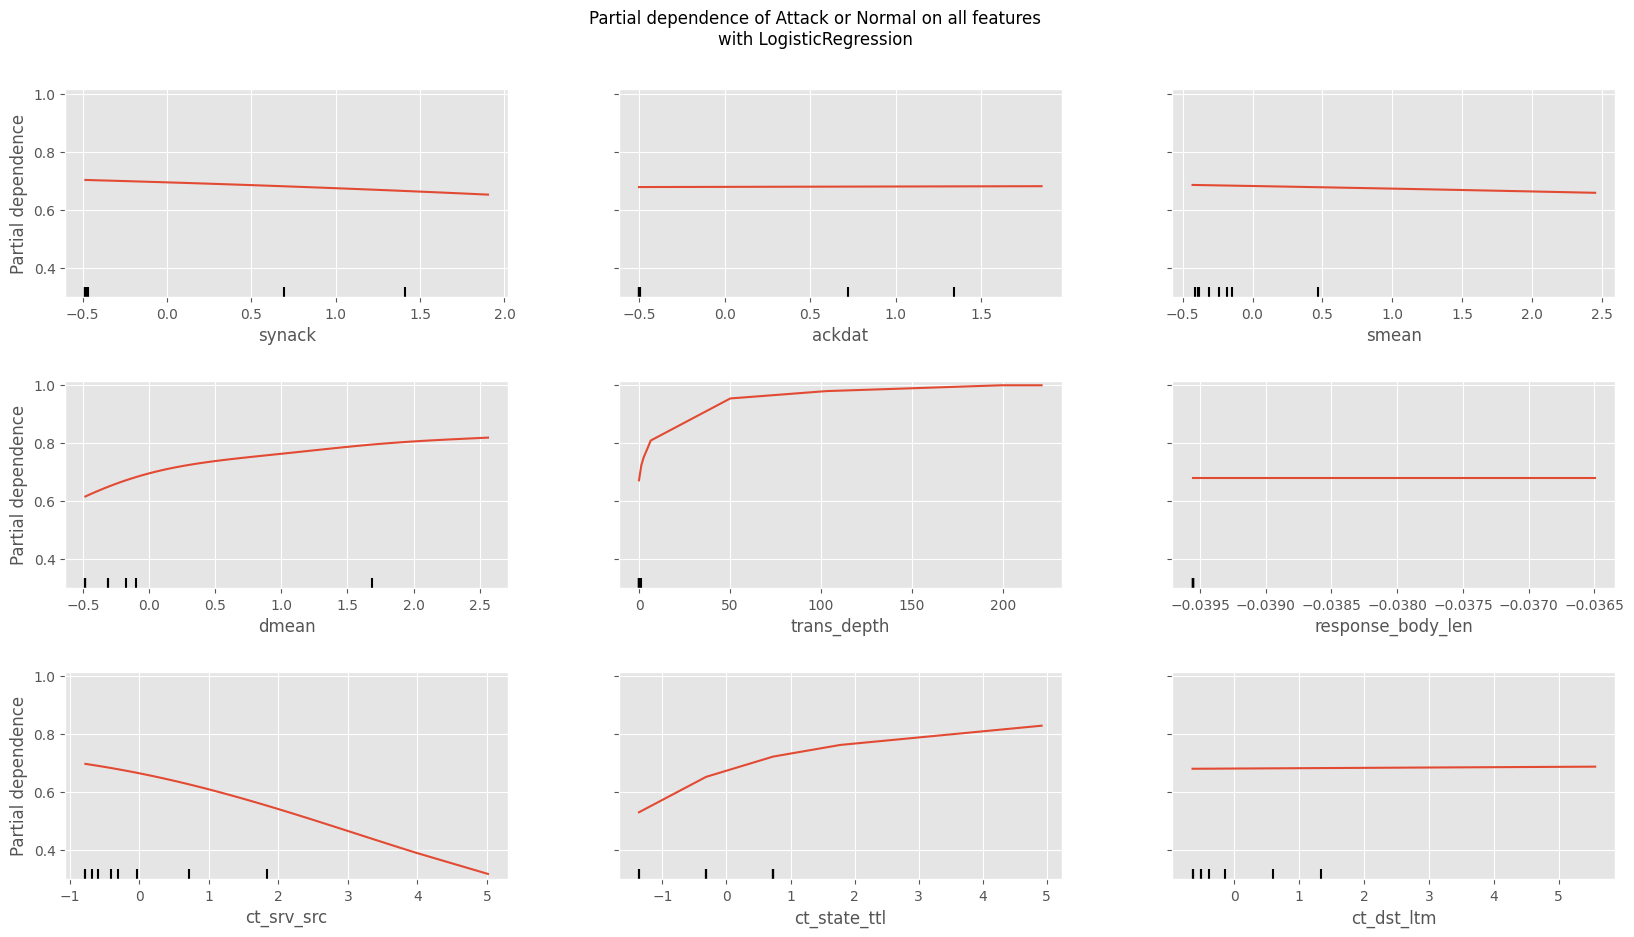

In [ ]:
clf_name = models[0][0]  # the classifier name
clf = models[0][1]  # the classifier itself

features = [21, 22, 23, 24, 25, 26, 27, 28, 29]

# Create the partial dependence plot
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Get the figure from the display object
fig = display.figure_

# Customize the figure
fig.suptitle("Partial dependence of Attack or Normal on all features\nwith {}".format(clf_name))
fig.set_size_inches(20, 10)
fig.subplots_adjust(hspace=.4, wspace=.25, top=.9)


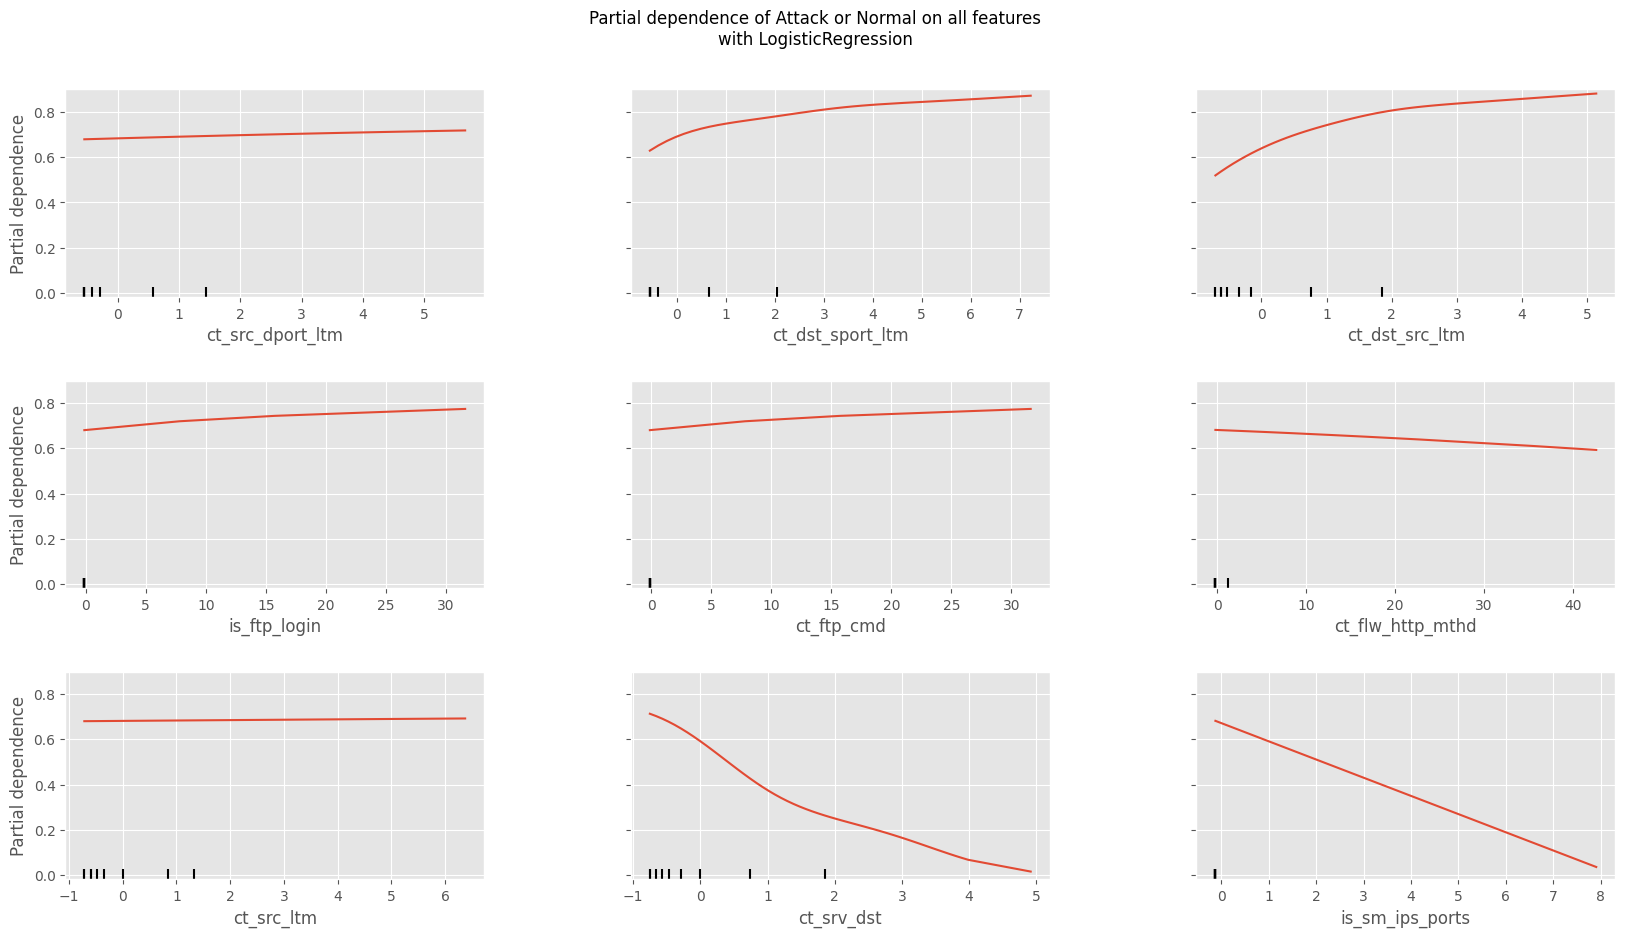

In [ ]:
clf_name = models[0][0]  # the classifier name
clf = models[0][1]  # the classifier itself

features = [30, 31, 32, 33, 34, 35, 36, 37, 38]

# Creating the partial dependence plot
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal on all features\nwith {}".format(clf_name))
fig.set_size_inches(20, 10)
fig.subplots_adjust(hspace=.4, wspace=.35, top=0.9)


We could also plot a 2-way PDP, for example, visualizing the effect of the joint of `swin` and `ct_src_dport_itm` on the response by specifying a `tuple` that contains the indexes of them.

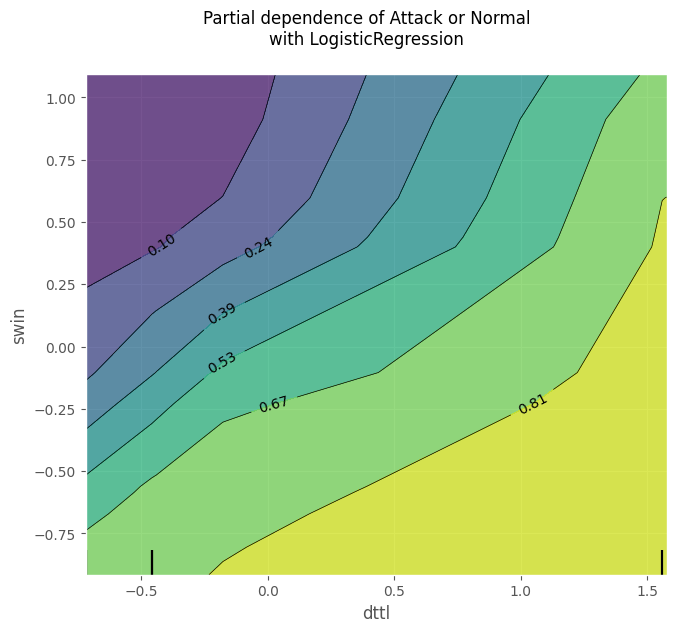

In [ ]:
features = [(7, 16)]  # Pair of features for which to plot the partial dependence

# Creating the partial dependence plot
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal\nwith {}".format(clf_name))
fig.set_size_inches(7.5, 6.5)
fig.subplots_adjust(hspace=0.3)

#We can do whatever we want in this code, cause our data features are too many, here just show one instance of top two features of permutation plots

We could also plot the one-way and two-way PDP together.

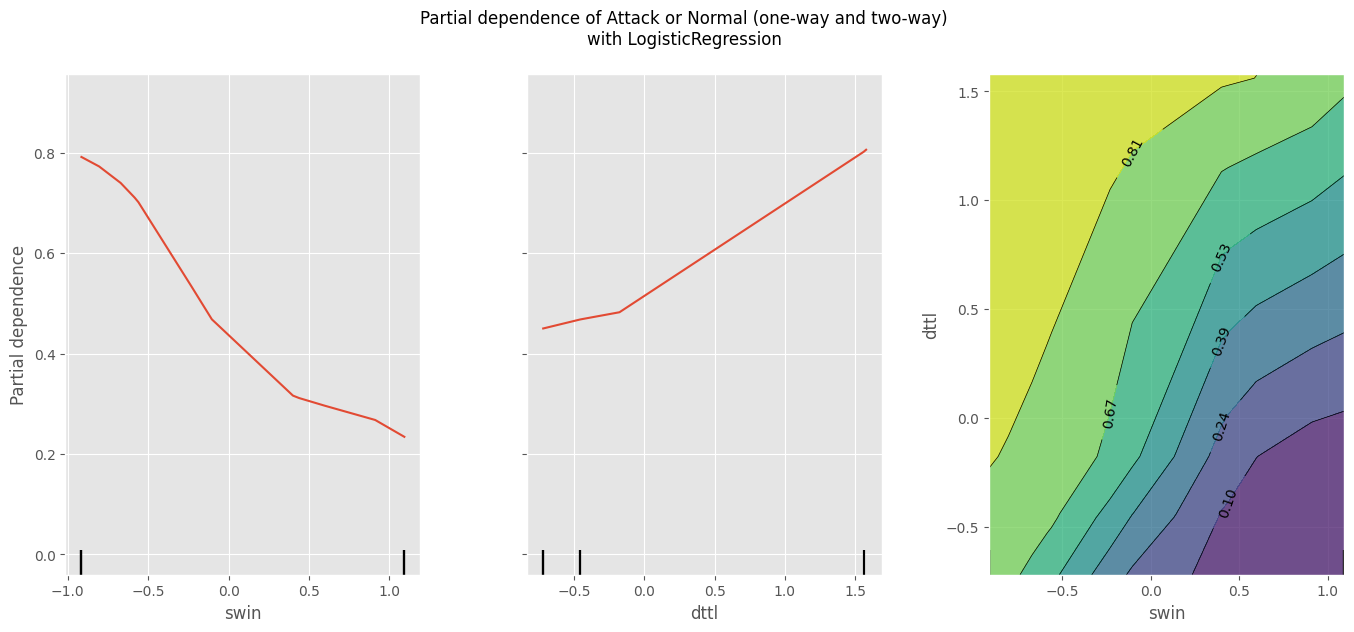

In [ ]:
features = [16, 7, (16, 7)]  # Includes both individual features and their interaction

# Creating the partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal (one-way and two-way)\nwith {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace=0.3)


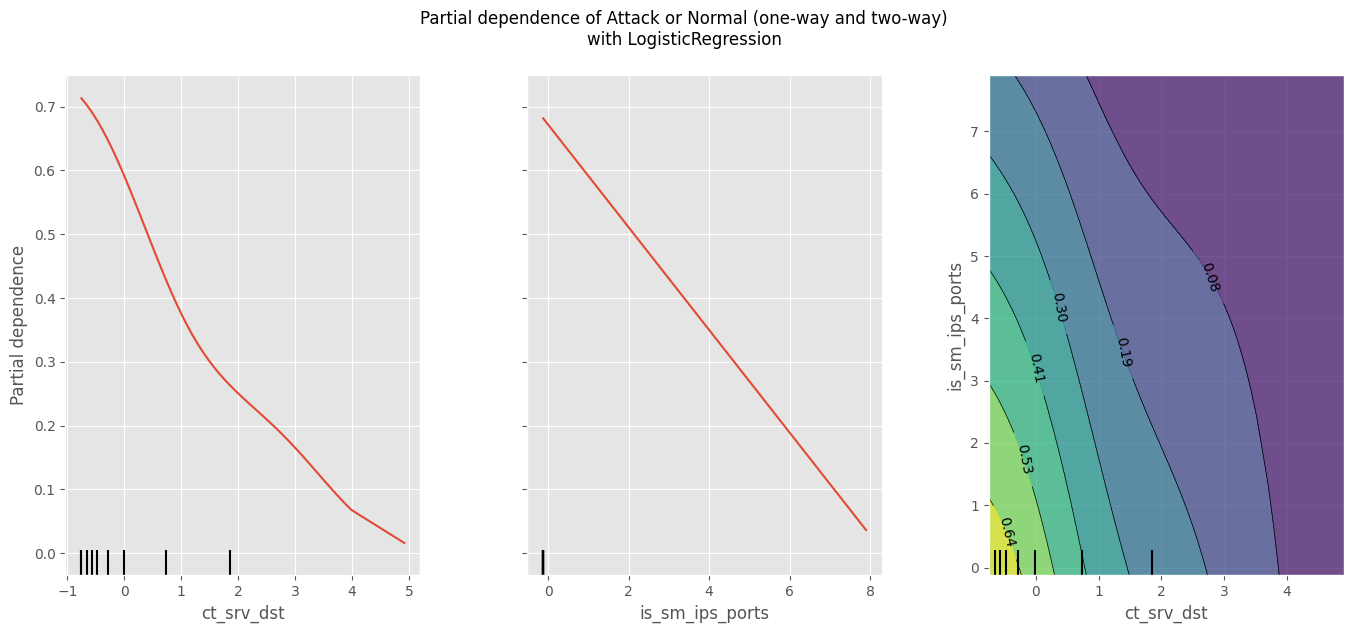

In [ ]:
features = [37, 38, (37, 38)]  # Individual features and their interaction

# Creating the partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal (one-way and two-way)\nwith {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace=0.3)


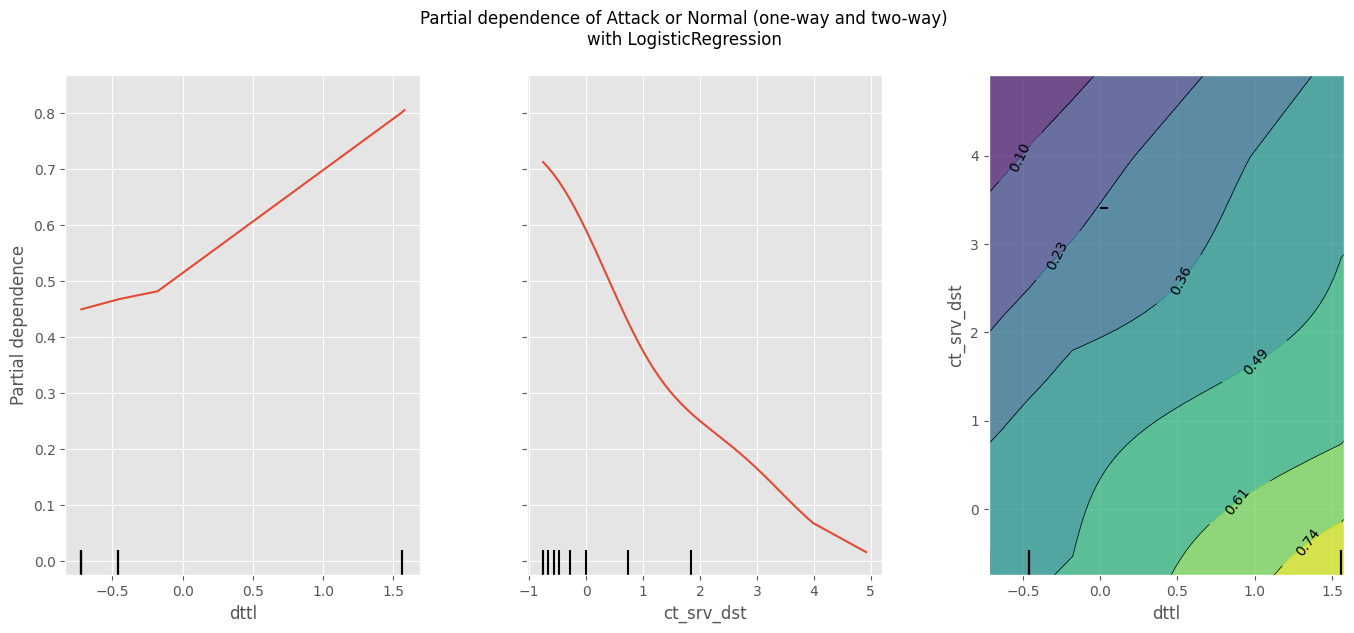

In [ ]:
features = [7, 37, (7, 37)]  # Individual features and their interaction

# Creating the partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal (one-way and two-way)\nwith {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace=0.3)


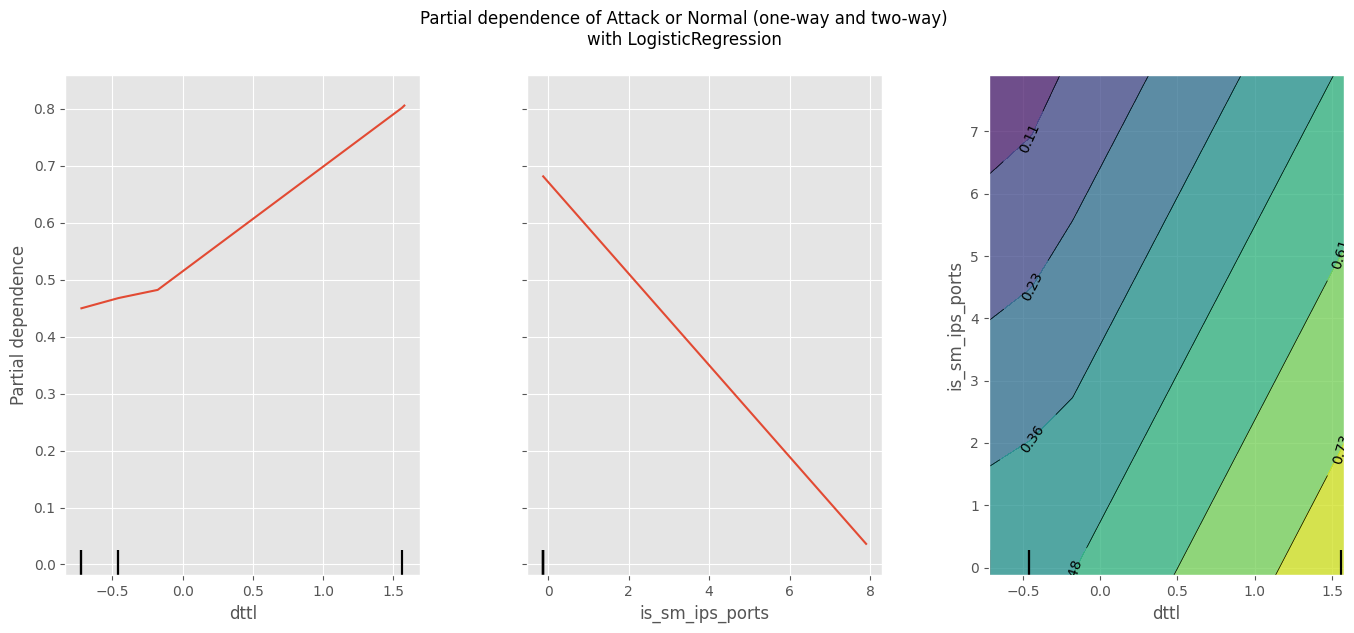

In [ ]:
features = [7, 38, (7, 38)]  # Individual features and their interaction

# Creating the partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal (one-way and two-way)\nwith {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace=0.3)


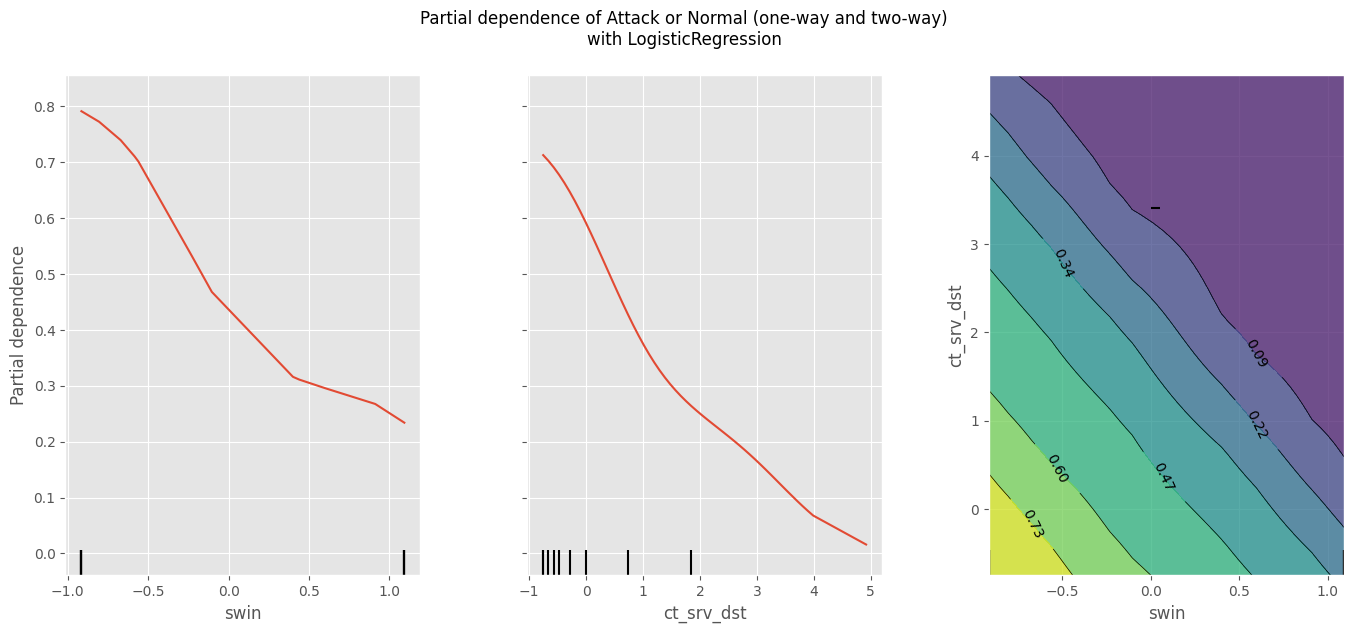

In [ ]:
features = [16, 37, (16, 37)]  # Individual features and their interaction

# Creating the partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal (one-way and two-way)\nwith {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace=0.3)


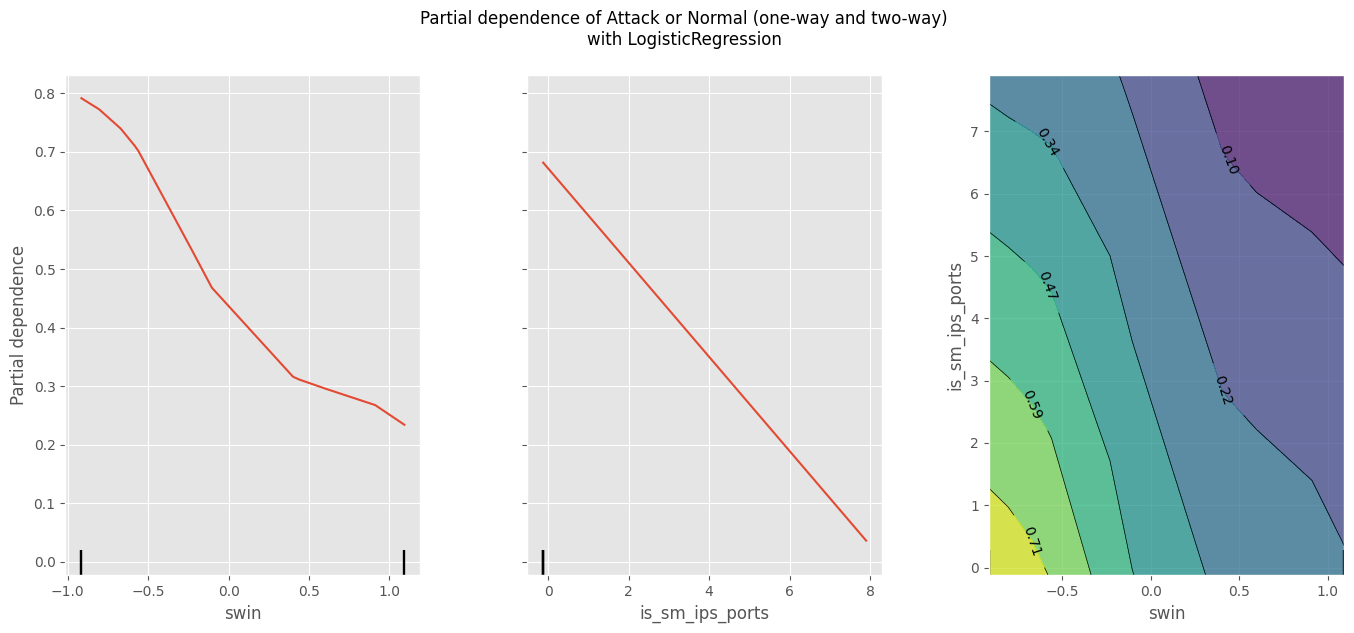

In [ ]:
features = [16, 38, (16, 38)]  # Individual features and their interaction

# Creating the partial dependence plots
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack or Normal (one-way and two-way)\nwith {}".format(clf_name))
fig.set_size_inches(16.5, 6.5)
fig.subplots_adjust(wspace=0.3)


### Example: PDP for RandomTree
Let's plot the effect (one-way and two-way) for `RandomForest`.

In [ ]:
models[2]

('RandomForest', RandomForestClassifier(random_state=123))

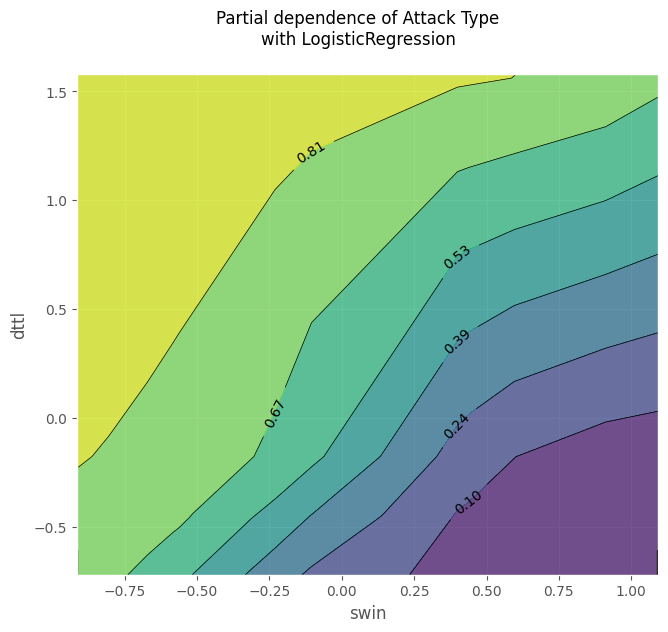

In [ ]:
features = [(16, 7)]  # The interaction of features at indices 16 and 7

# Creating the partial dependence plot
display = PartialDependenceDisplay.from_estimator(
    clf,
    X_train_transform,
    features,
    feature_names=new_cols,
    target=1
)

# Obtaining the figure from the display object
fig = display.figure_

# Customizing the figure
fig.suptitle("Partial dependence of Attack Type\nwith {}".format(clf_name))
fig.set_size_inches(7.5, 6.5)
fig.subplots_adjust(hspace=0.3)


## Permutation Feature Importance

As established in the previous section, Partial Dependence Plots can illustrate the influence of a feature on model predictions. We now turn our attention to a fundamental question: Which features exert the most significant impact on predictions?

This leads us to the concept of **feature importance**.

There are various methods to assess feature importance, each addressing slightly different aspects of the aforementioned question. Some of these methods have known limitations.

Our focus here is on **Permutation Feature Importance**. This method is advantageous because it is:

- quick to compute,
- broadly recognized and utilized, and
- aligns well with desirable attributes of a feature importance measure.

Permutation Feature Importance is determined by the **reduction in a model's accuracy** when the values of a single feature are randomly shuffled. This shuffling disrupts the connection between the feature and the target, making the decrease in model accuracy a measure of the feature's importance to the model.


In [ ]:
# import permutation function
from sklearn.inspection import permutation_importance

#### Permutation Feature Importance on Training Data
Let's first plot the Permutation Feature Importance on **training data** with the trained Logistic Regression.

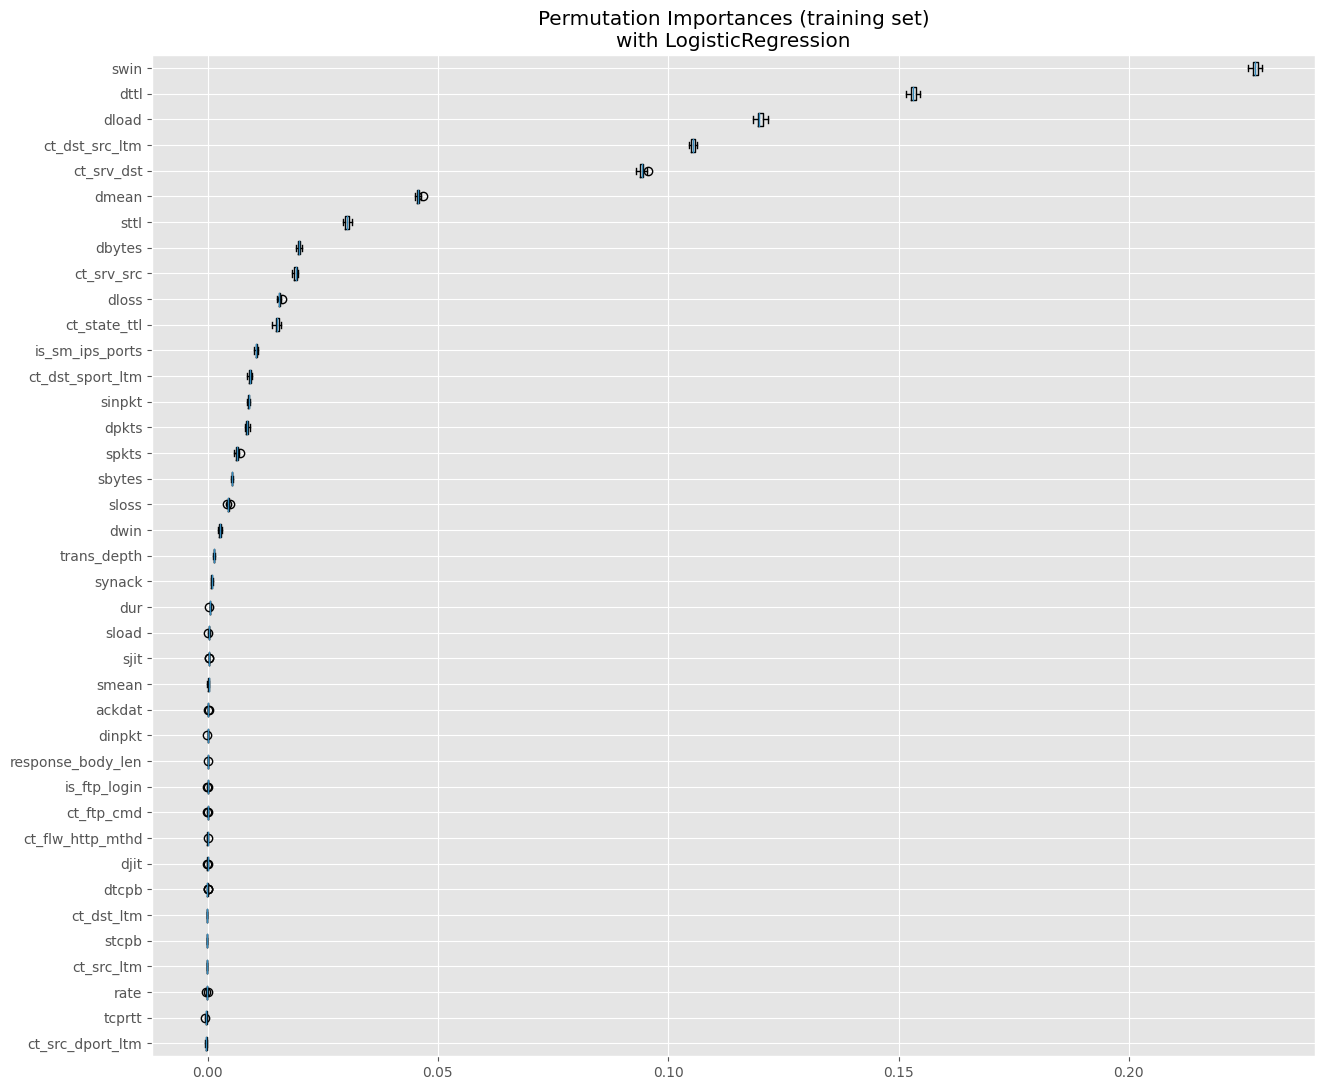

In [ ]:
clf_name = models[0][0]
clf = models[0][1]
result = permutation_importance(estimator=clf,
                                X=X_train_transform,
                                y=y2_train_transform,
                                scoring="accuracy",
                                n_repeats=50,
                                random_state=123)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(new_cols)[sorted_idx])
ax.set_title("Permutation Importances (training set)\n"
            "with {}".format(clf_name))

fig.set_size_inches(15, 13)
plt.show()

**Understanding the Results**

- Features appearing at the top of the list are the most influential, whereas those at the bottom have the least impact.

- The numeric values indicate the extent to which the model's performance, measured here by `accuracy`, deteriorated due to the random permutation of feature values.

In the presented plot, `ct_src_dport_itm` emerges as the most impactful feature for the Logistic Regression model. The significance of this feature is highlighted by the observation that randomly shuffling the `ct_src_dport_itm` column in the training dataset, while keeping the target and all other columns unchanged, leads to a **decline** in the `accuracy` score of the predictions by approximately 0.24. This is a noteworthy insight.

#### Permutation Feature Importance Using Hold-out Test Data

The computation of permutation importances can be performed on either the training dataset or a held-out test or validation set. Each approach offers distinct insights:
- Calculating on a held-out set helps identify the features that most significantly contribute to the model's ability to generalize to new data.

- If certain features are deemed important in the training set but not in the held-out set, it could be an indication that the model is overfitting to those features.

Next, we will generate a plot illustrating the Permutation Feature Importance on the **hold-out testing data**.

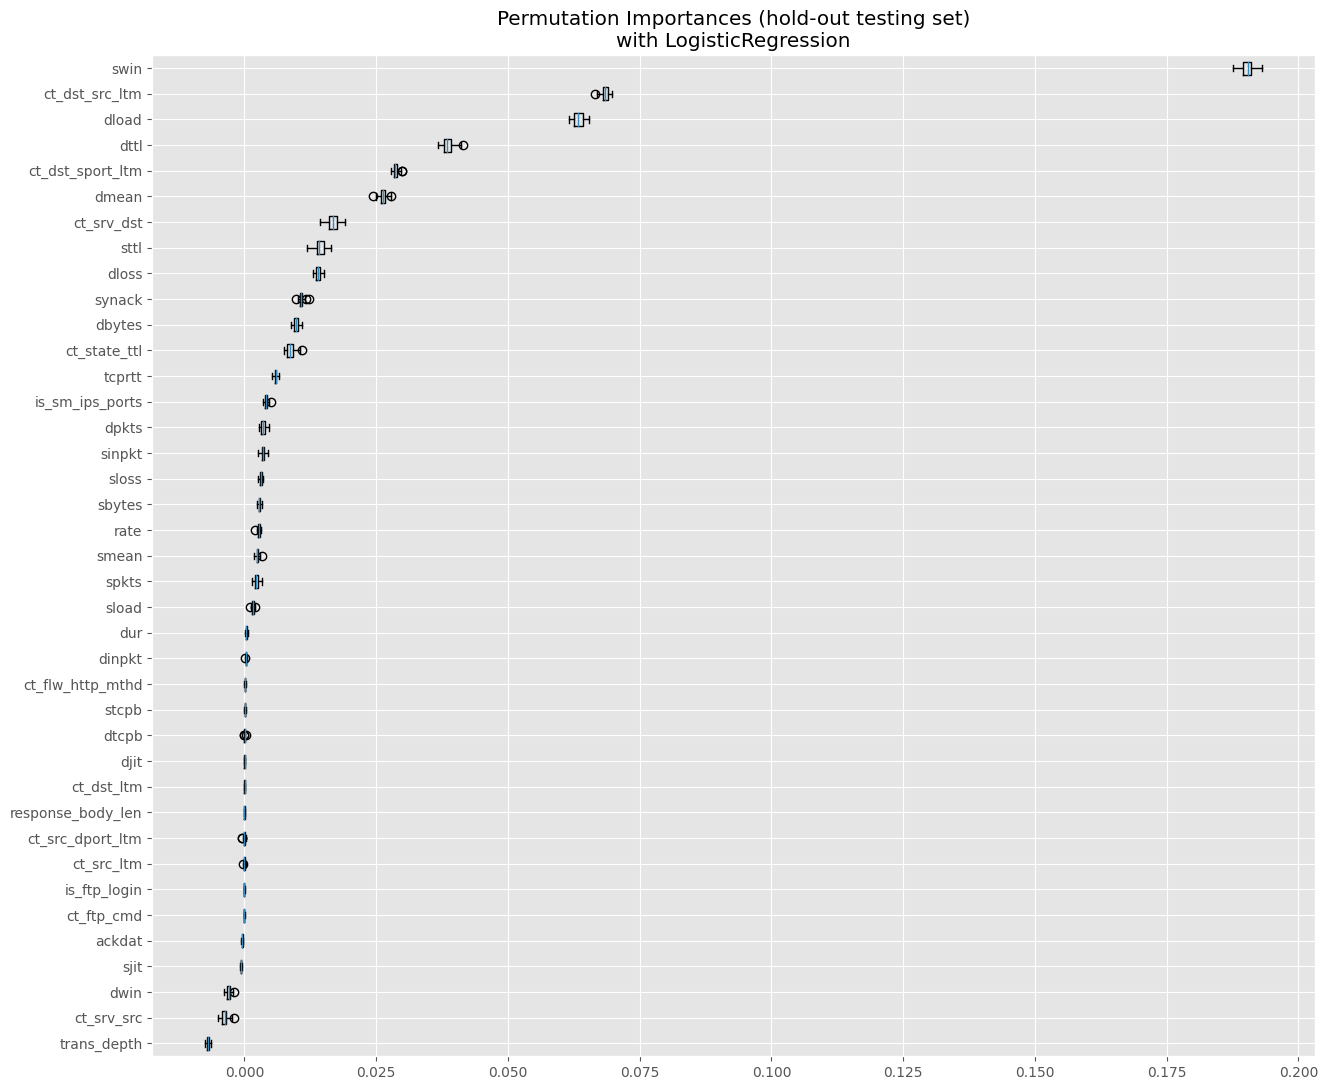

In [ ]:
result = permutation_importance(estimator=clf,
                                X=X_test_transform,
                                y=y2_test_transform,
                                scoring="accuracy",
                                n_repeats=50,
                                random_state=123)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()

ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=np.array(new_cols)[sorted_idx])
ax.set_title("Permutation Importances (hold-out testing set)\n"
            "with {}".format(clf_name))
fig.set_size_inches(15, 13)

plt.show()

# Attack Classification

# Implementing Various Machine Learning Models

In the process of implementing multiple ML models, the primary variation involves changing the classifier instantiation. Specifically, this means replacing `clf = LogisticRegression()` with other model functions depending on the algorithm being applied.

Here are the ML model functions we'll use:

- For Logistic Regression: `clf = LogisticRegression()`
- For Decision Trees: `clf = DecisionTreeClassifier()`
- For Random Forest: `clf = RandomForestClassifier()`
- For Neural Networks (Multi-layer Perceptron): `clf = MLPClassifier()`

It's worth noting that in the `MLPClassifier()`, we opt for the `lbfgs` solver as it tends to perform better with smaller datasets. Additionally, we set the maximum number of iterations to 2000 to ensure the model has sufficient opportunity to converge. The `random_state` parameter is included to guarantee that the results are reproducible. Each of these classifiers will be applied following the data preparation steps, allowing for a comparative analysis of their performance on the dataset.

In [46]:
# Define four models
models = [('LogisticRegression', LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=123, max_iter = 1000)),
          ('DecisionTree', DecisionTreeClassifier(random_state=123)),
          ('RandomForest', RandomForestClassifier(random_state=123)),
          ('MultiLayerPerceptron', MLPClassifier(random_state=123, solver='adam', max_iter=2000))
         ]

We could check the hyperparameters values in these models:

In [47]:
for model_name, clf in models:
    print(clf)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)
DecisionTreeClassifier(random_state=123)
RandomForestClassifier(random_state=123)
MLPClassifier(max_iter=2000, random_state=123)


**Finally, we write the code to perform the above four ML models and store their cross-validation results and evaluation results on testing data.**

In [48]:
# define several lists and dataframe to store the CV results and evaluation results on testing data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate

# Lists to store final results
model_names_list = []
cv_fit_time_mean_list = []
cv_accuracy_mean_list = []
cv_precision_mean_list = []
cv_recall_mean_list = []
cv_f1_mean_list = []
cv_roc_auc_mean_list = []

test_accuracy_list = []
test_precision_list = []
test_recall_list = []
test_f1_list = []
test_roc_auc_list = []

test_roc_curve_df = pd.DataFrame()

for model_name, clf in models:
    print(f"Processing model: {model_name}")

    # Initialize lists to store the results for each fold
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    # Define 3-fold cross-validator
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

    # Manually iterate over the folds
    for i, (train_index, test_index) in enumerate(cv.split(X_train_transform, y1_train_transform)):
        print(f"Processing fold {i+1}/3 for {model_name}")

        # Split data
        X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
        y_train, y_test = y1_train_transform[train_index], y1_train_transform[test_index]

        # Fit the model
        clf.fit(X_train, y_train)

        # Make predictions
        y_pred = clf.predict(X_test)

        # Compute the scores for each fold
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
        roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

        print(f"Completed fold {i+1}/3 for {model_name}")

    # Calculate and store the mean of the scores
    model_names_list.append(model_name)
    cv_accuracy_mean_list.append(np.mean(accuracy_scores))
    cv_precision_mean_list.append(np.mean(precision_scores))
    cv_recall_mean_list.append(np.mean(recall_scores))
    cv_f1_mean_list.append(np.mean(f1_scores))
    cv_roc_auc_mean_list.append(np.mean(roc_auc_scores))

    # Additional steps for testing evaluation can be added here
    # ...

# Output the average scores
print("CV Mean Scores:")
print("Model Names:", model_names_list)
print("Accuracy:", cv_accuracy_mean_list)
print("Precision (Weighted):", cv_precision_mean_list)
print("Recall (Weighted):", cv_recall_mean_list)
print("F1 (Weighted):", cv_f1_mean_list)
print("ROC AUC (OvR):", cv_roc_auc_mean_list)


Processing model: LogisticRegression
Processing fold 1/3 for LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed fold 1/3 for LogisticRegression
Processing fold 2/3 for LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Completed fold 2/3 for LogisticRegression
Processing fold 3/3 for LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed fold 3/3 for LogisticRegression
Processing model: DecisionTree
Processing fold 1/3 for DecisionTree
Completed fold 1/3 for DecisionTree
Processing fold 2/3 for DecisionTree
Completed fold 2/3 for DecisionTree
Processing fold 3/3 for DecisionTree
Completed fold 3/3 for DecisionTree
Processing model: RandomForest
Processing fold 1/3 for RandomForest
Completed fold 1/3 for RandomForest
Processing fold 2/3 for RandomForest
Completed fold 2/3 for RandomForest
Processing fold 3/3 for RandomForest
Completed fold 3/3 for RandomForest
Processing model: MultiLayerPerceptron
Processing fold 1/3 for MultiLayerPerceptron
Completed fold 1/3 for MultiLayerPerceptron
Processing fold 2/3 for MultiLayerPerceptron
Completed fold 2/3 for MultiLayerPerceptron
Processing fold 3/3 for MultiLayerPerceptron
Completed fold 3/3 for MultiLayerPerceptron
CV Mean Scores:
Model Names: ['LogisticRegression', 'DecisionTree', 'RandomForest', 'MultiLayerPerceptron']
Accuracy: [0.7917315402558444, 0.84404104003

### Model Comparison

We've stored CV results and evaluation results of testing data for the four ML models. Then, we could create a dataframe to view them.

In [62]:
results_dict = {'Model Name': model_names_list,
                'CV Accuracy mean': cv_accuracy_mean_list,
                'CV Precision mean': cv_precision_mean_list,
                'CV Recall mean': cv_recall_mean_list,
                'CV F1 mean': cv_f1_mean_list
                }

results_df = pd.DataFrame(results_dict)

# sort the results according to F1 score on testing data
results_df.sort_values(by='CV F1 mean', ascending=False)

Model Name  CV Accuracy mean  CV Precision mean  CV Recall mean  \
3  MultiLayerPerceptron          0.847109           0.846039        0.847109   
1          DecisionTree          0.844041           0.845641        0.844041   
2          RandomForest          0.842872           0.837947        0.842872   
0    LogisticRegression          0.791732           0.776234        0.791732   

   CV F1 mean  
3    0.846005  
1    0.844790  
2    0.833279  
0    0.770671

In [63]:
# Find the index of the model with the highest mean accuracy
best_model_index = np.argmax(cv_f1_mean_list)

# Retrieve the best model's name
best_model_name = model_names_list[best_model_index]
print(f"The best model based on CV mean accuracy is {best_model_name}")


The best model based on CV mean accuracy is MultiLayerPerceptron


In [65]:
structure = [coef.shape for coef in clf.coefs_]

print("MLP Structure:")
for i, layer_structure in enumerate(structure):
    print(f"Layer {i}: {layer_structure}")


MLP Structure:
Layer 0: (192, 100)
Layer 1: (100, 10)


## Predicting with best model

In [51]:
# ==== Step 2: Evaluation on Testing data =====

# Prediction on testing data
y_pred_class = clf.predict(X_test_transform)


# For multiclass, modify this step as needed

# Accuracy
accuracy_ontest = accuracy_score(y_true=y1_test_transform, y_pred=y_pred_class)

# Precision, Recall, F1 with zero_division parameter
precision_ontest = precision_score(y_true=y1_test_transform, y_pred=y_pred_class, average='weighted', zero_division=0)
recall_ontest = recall_score(y_true=y1_test_transform, y_pred=y_pred_class, average='weighted', zero_division=0)
f1_ontest = f1_score(y_true=y1_test_transform, y_pred=y_pred_class, average='weighted', zero_division=0)

# Store the above values
test_accuracy_list.append(accuracy_ontest)
test_precision_list.append(precision_ontest)
test_recall_list.append(recall_ontest)
test_f1_list.append(f1_ontest)



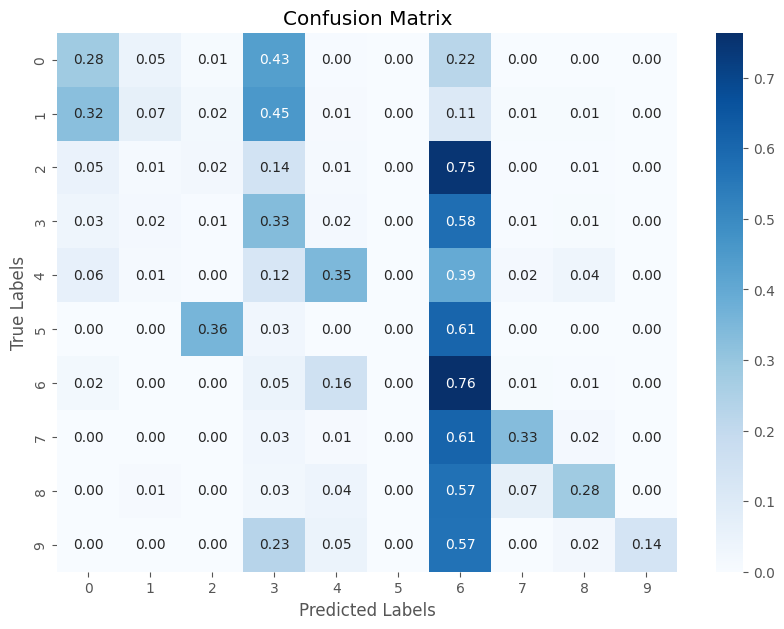

In [60]:
# Creating the confusion matrix
cm = confusion_matrix(y1_test_transform, y_pred_class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()